In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Notes

In [2]:
olympics=pd.read_csv('/Users/anshulsingh/Desktop/MLProjects/Projects/Olympic Data Analysis/athlete_events.csv')
regions=pd.read_csv('/Users/anshulsingh/Desktop/MLProjects/Projects/Olympic Data Analysis/noc_regions.csv')

olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:


olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# Cleaning

In [5]:
olympics = pd.merge(olympics, regions, on='NOC', how='left')
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [6]:
olympics.drop(columns = ['Games','Team', 'notes'], inplace=True)
olympics

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [7]:
olympics.rename(columns={'region' : 'Team'}, inplace=True)
olympics

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [8]:
olympics.drop_duplicates(inplace = True)
olympics

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [9]:
olympics['Age'] = olympics['Age'].fillna(0).astype(int)


In [10]:
olympics['Age'].replace(0, np.nan, inplace=True)

# Calculate the median excluding NaN values
column_median_age = olympics['Age'].median(skipna=True)

# Fill NaN values with the median
olympics['Age'].fillna(column_median_age, inplace=True)

/var/folders/vb/ryn151ws71sc7z08spy69ltw0000gn/T/ipykernel_57258/2667417941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics['Age'].replace(0, np.nan, inplace=True)


In [11]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269718 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269718 non-null  int64  
 1   Name    269718 non-null  object 
 2   Sex     269718 non-null  object 
 3   Age     269718 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   NOC     269718 non-null  object 
 7   Year    269718 non-null  int64  
 8   Season  269718 non-null  object 
 9   City    269718 non-null  object 
 10  Sport   269718 non-null  object 
 11  Event   269718 non-null  object 
 12  Medal   39772 non-null   object 
 13  Team    269348 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 30.9+ MB


In [12]:
# Calculate median values for each gender
median_female = olympics.loc[olympics['Sex'] == 'F', 'Height'].median()
median_male = olympics.loc[olympics['Sex'] == 'M', 'Height'].median()

# Fill NaN values based on gender
olympics.loc[olympics['Sex'] == 'F', 'Height'] = olympics.loc[olympics['Sex'] == 'F', 'Height'].fillna(median_female)
olympics.loc[olympics['Sex'] == 'M', 'Height'] = olympics.loc[olympics['Sex'] == 'M', 'Height'].fillna(median_male)


In [13]:
# Calculate median values for each gender
median_female = olympics.loc[olympics['Sex'] == 'F', 'Weight'].median()
median_male = olympics.loc[olympics['Sex'] == 'M', 'Weight'].median()

# Fill NaN values based on gender
olympics.loc[olympics['Sex'] == 'F', 'Weight'] = olympics.loc[olympics['Sex'] == 'F', 'Weight'].fillna(median_female)
olympics.loc[olympics['Sex'] == 'M', 'Weight'] = olympics.loc[olympics['Sex'] == 'M', 'Weight'].fillna(median_male)


In [14]:
# Define the dictionary of replacements
replacements = {'Gold': 3, 'Silver': 2, 'Bronze': 1}

# Replace values using the dictionary
olympics['Medal'] = olympics['Medal'].replace(replacements)

/var/folders/vb/ryn151ws71sc7z08spy69ltw0000gn/T/ipykernel_57258/165044632.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  olympics['Medal'] = olympics['Medal'].replace(replacements)


In [15]:
olympics['Medal'].fillna(0).astype(int)

0         0
1         0
2         0
3         3
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal, Length: 269718, dtype: int64

In [16]:
olympics['Medal'].replace(0, np.nan, inplace=True)
olympics['Medal']

/var/folders/vb/ryn151ws71sc7z08spy69ltw0000gn/T/ipykernel_57258/3338878278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics['Medal'].replace(0, np.nan, inplace=True)


0         NaN
1         NaN
2         NaN
3         3.0
4         NaN
         ... 
271111    NaN
271112    NaN
271113    NaN
271114    NaN
271115    NaN
Name: Medal, Length: 269718, dtype: float64

In [17]:
olympics=olympics.drop_duplicates(subset=['Team', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'])
olympics                                  

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3.0,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271095,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,POL,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland
271096,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,POL,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland
271097,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,POL,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 10,000 metres",NaN,Poland
271098,135559,Pawe Jan Zygmunt,M,33.0,182.0,79.0,POL,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland


In [18]:
olympics = olympics[olympics['Medal'].notna()]


In [19]:
olympics

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Team
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3.0,Denmark
37,15,Arvo Ossian Aaltonen,M,30.0,179.0,74.0,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1.0,Finland
38,15,Arvo Ossian Aaltonen,M,30.0,179.0,74.0,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1.0,Finland
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1.0,Finland
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1.0,Finland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271010,135521,Anton Zwerina,M,23.0,179.0,66.0,AUT,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,2.0,Austria
271032,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,NED,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,1.0,Netherlands
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,URS,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,3.0,Russia
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,2.0,Russia


# Visualizations

<Figure size 1200x600 with 0 Axes>

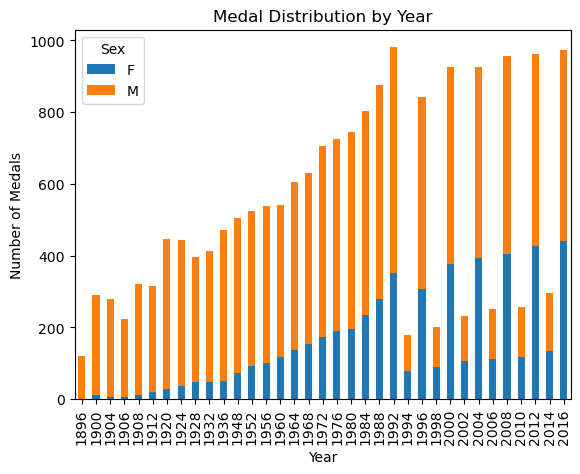

In [20]:

# Medal Distribution by Year
plt.figure(figsize=(12, 6))
medals_by_year = olympics.groupby(['Year', 'Sex'])['Medal'].count().unstack()
medals_by_year.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Medal Distribution by Year')
plt.show()


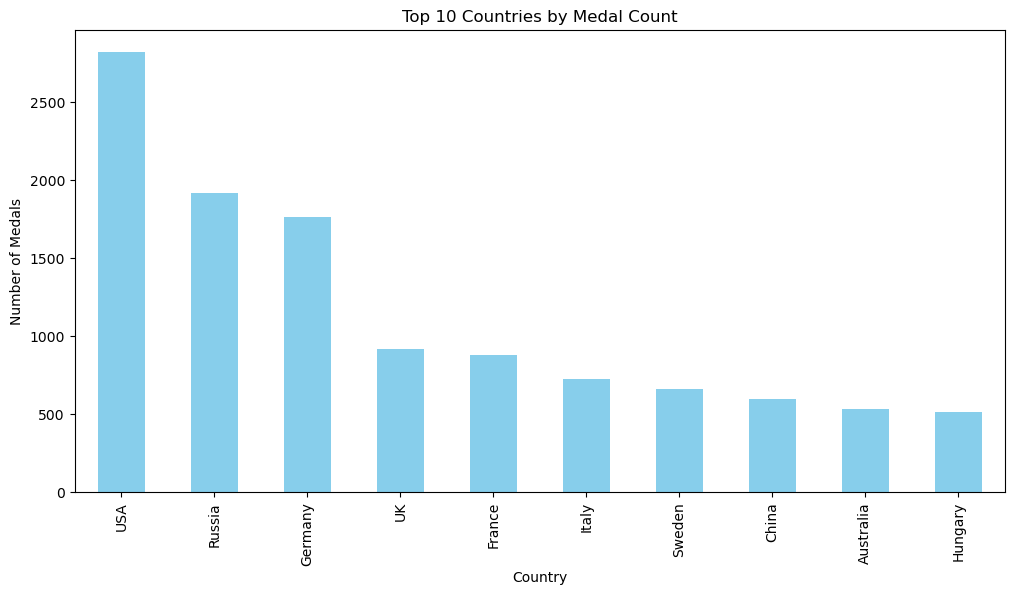

In [21]:

# Medal Distribution by Country
plt.figure(figsize=(12, 6))
medals_by_country = olympics.groupby(['Team', 'Sex'])['Medal'].count().unstack()
medals_by_country.sum(axis=1).nlargest(10).plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Top 10 Countries by Medal Count')
plt.show()


<Figure size 1200x600 with 0 Axes>

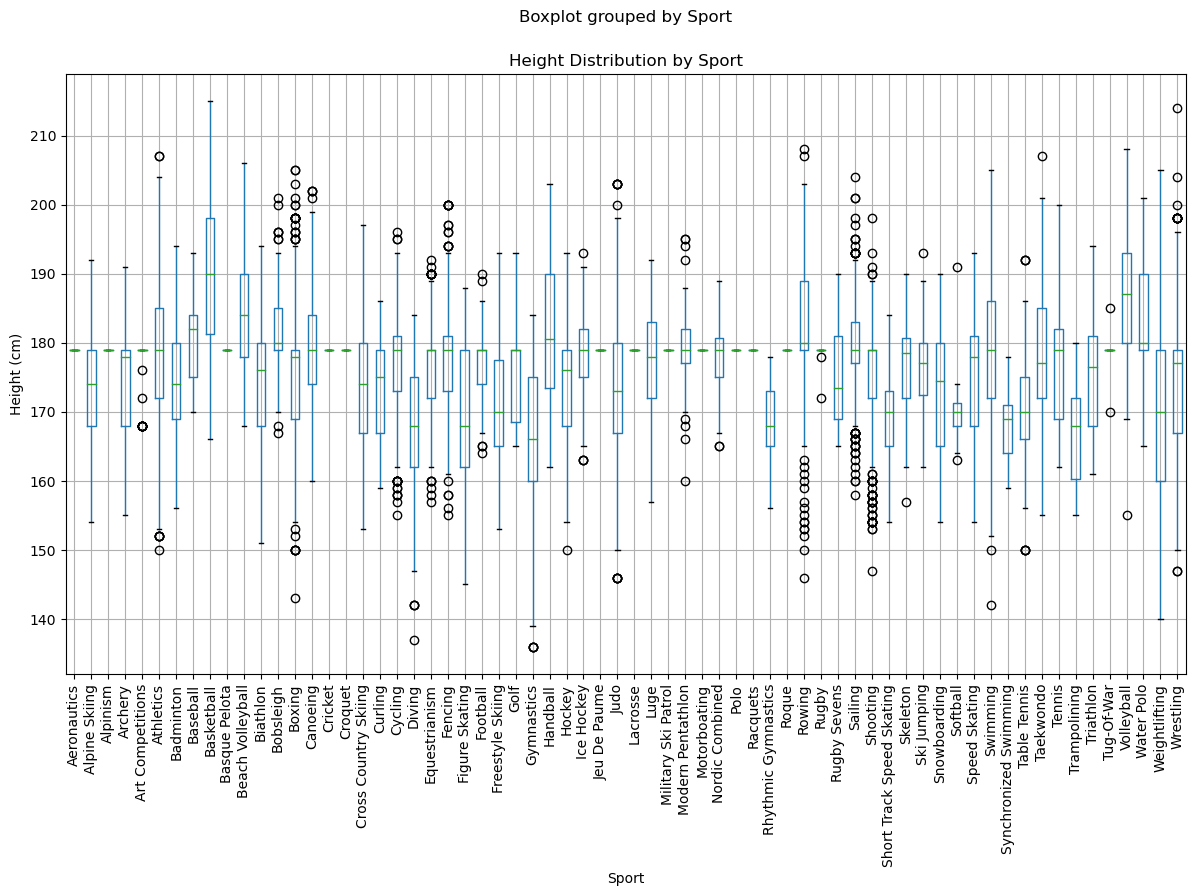

In [22]:

# Height Distribution by Sport
plt.figure(figsize=(12, 6))
olympics.boxplot(column='Height', by='Sport', figsize=(14, 8), rot=90)
plt.title('Height Distribution by Sport')
plt.ylabel('Height (cm)')
plt.xlabel('Sport')
plt.show()

<Figure size 1200x600 with 0 Axes>

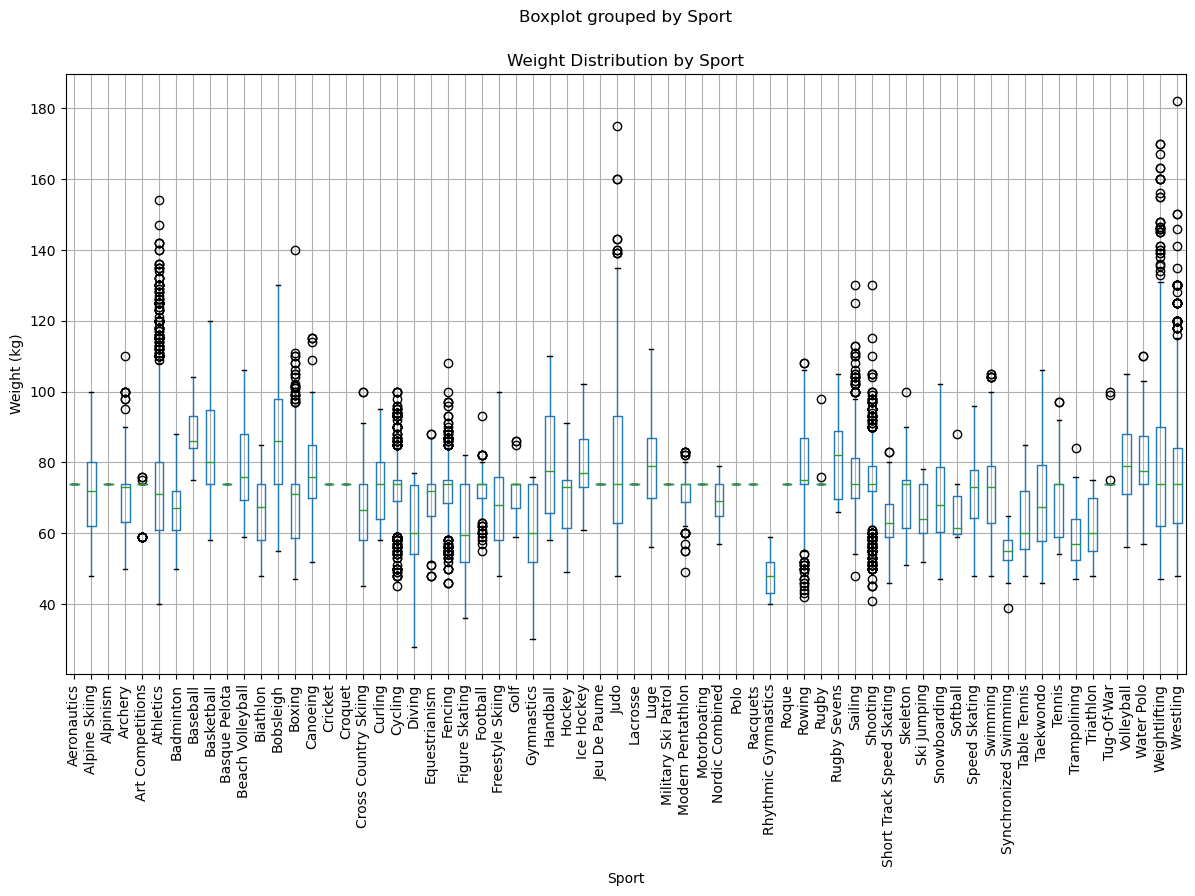

In [23]:
# Weight Distribution by Sport
plt.figure(figsize=(12, 6))
olympics.boxplot(column='Weight', by='Sport', figsize=(14, 8), rot=90)
plt.title('Weight Distribution by Sport')
plt.ylabel('Weight (kg)')
plt.xlabel('Sport')
plt.show()

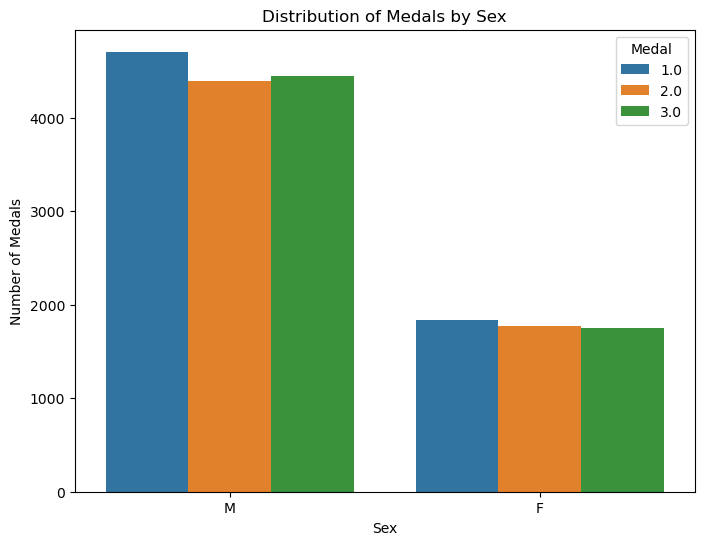

In [24]:
# Create a countplot to visualize the distribution of medals by sex
plt.figure(figsize=(8, 6))
sns.countplot(data=olympics, x='Sex', hue='Medal')
plt.title('Distribution of Medals by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Medals')
plt.legend(title='Medal')
plt.show()

# Modelling

In [25]:
X=olympics.drop(['ID', 'Name', 'NOC', 'Event', 'Medal'], axis = 1)
X

,Sex,Age,Height,Weight,Year,Season,City,Sport,Team
3,M,34.0,179.0,74.0,1900,Summer,Paris,Tug-Of-War,Denmark
37,M,30.0,179.0,74.0,1920,Summer,Antwerpen,Swimming,Finland
38,M,30.0,179.0,74.0,1920,Summer,Antwerpen,Swimming,Finland
40,M,28.0,184.0,85.0,2014,Winter,Sochi,Ice Hockey,Finland
41,M,28.0,175.0,64.0,1948,Summer,London,Gymnastics,Finland
...,...,...,...,...,...,...,...,...,...
271010,M,23.0,179.0,66.0,1924,Summer,Paris,Weightlifting,Austria
271032,F,22.0,181.0,78.0,1996,Summer,Atlanta,Judo,Netherlands
271076,F,21.0,168.0,80.0,1952,Summer,Helsinki,Athletics,Russia
271078,F,25.0,168.0,80.0,1956,Summer,Melbourne,Athletics,Russia


In [26]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18905 entries, 3 to 271080
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      18905 non-null  int64  
 1   Name    18905 non-null  object 
 2   Sex     18905 non-null  object 
 3   Age     18905 non-null  float64
 4   Height  18905 non-null  float64
 5   Weight  18905 non-null  float64
 6   NOC     18905 non-null  object 
 7   Year    18905 non-null  int64  
 8   Season  18905 non-null  object 
 9   City    18905 non-null  object 
 10  Sport   18905 non-null  object 
 11  Event   18905 non-null  object 
 12  Medal   18905 non-null  float64
 13  Team    18900 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 2.2+ MB


In [28]:
olympics['Age'] = olympics['Age'].astype(int)
olympics['Height'] = olympics['Height'].astype(int)
olympics['Weight'] = olympics['Weight'].astype(int)
olympics['Medal'] = olympics['Medal'].astype(int)





/var/folders/vb/ryn151ws71sc7z08spy69ltw0000gn/T/ipykernel_57258/225002183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics['Age'] = olympics['Age'].astype(int)
/var/folders/vb/ryn151ws71sc7z08spy69ltw0000gn/T/ipykernel_57258/225002183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics['Height'] = olympics['Height'].astype(int)
/var/folders/vb/ryn151ws71sc7z08spy69ltw0000gn/T/ipykernel_57258/225002183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [29]:
# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'Team', 'Season', 'City', 'Sport']:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])


In [30]:
# Split data into training and testing sets
y = olympics['Medal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [31]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
# Make predictions
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3538746363395927


In [34]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")

Logistic Regression: Accuracy = 0.35
Decision Tree: Accuracy = 0.35
Random Forest: Accuracy = 0.36
Support Vector Machine: Accuracy = 0.35
K-Nearest Neighbors: Accuracy = 0.33
Naive Bayes: Accuracy = 0.35


In [35]:
olympics.to_csv('/Users/anshulsingh/Desktop/MLProjects/Projects/Olympic Data Analysis/olympics_output_2.csv')